참고:

[영화 데이터를 활용한 데이터 분석 (실습파일)](https://dacon.io/competitions/open/235536/codeshare/1327?page=1&dtype=recent)

[베이스라인 코드](https://dacon.io/competitions/open/235536/codeshare/4158?page=1&dtype=recent)

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
train = pd.read_csv('data/영화 관객수/movies_train.csv')
test = pd.read_csv('data/영화 관객수/movies_test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
test.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


In [8]:
print(train.shape, test.shape)

(600, 12) (243, 11)


In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<AxesSubplot:xlabel='genre', ylabel='box_off_num'>

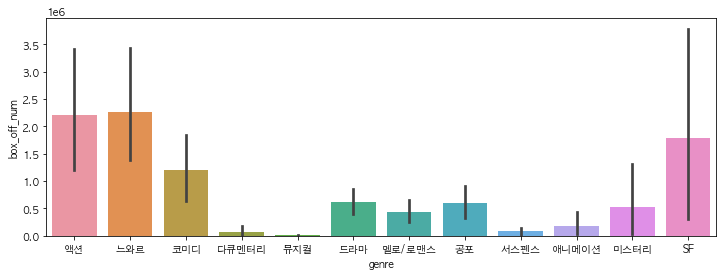

In [10]:
plt.figure(figsize=(12,4))
sns.barplot(data=train, x='genre', y='box_off_num')

In [11]:
train = pd.get_dummies(train, columns=['genre'])
test = pd.get_dummies(test, columns=['genre'])

In [12]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [13]:
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train['day'] = train['release_time'].dt.day

train = train.drop(['release_time'], axis=1)

test['year'] = test['release_time'].dt.year
test['month'] = test['release_time'].dt.month
test['day'] = test['release_time'].dt.day

test = test.drop(['release_time'], axis=1)


<AxesSubplot:xlabel='year', ylabel='box_off_num'>

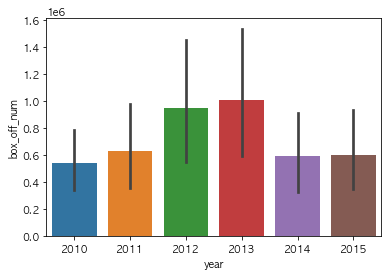

In [14]:
sns.barplot(data=train, x='year', y='box_off_num')

<AxesSubplot:xlabel='month', ylabel='box_off_num'>

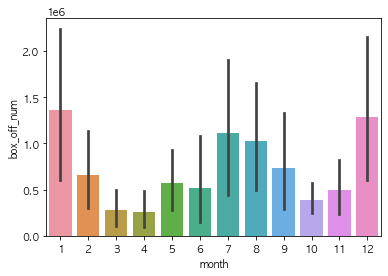

In [15]:
sns.barplot(data=train, x='month', y='box_off_num')

<AxesSubplot:xlabel='day', ylabel='box_off_num'>

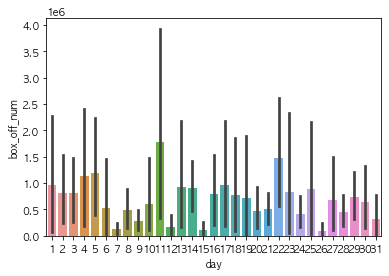

In [16]:
sns.barplot(data=train, x='day', y='box_off_num')

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

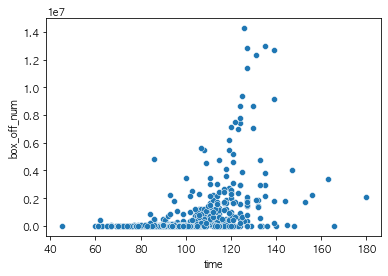

In [17]:
sns.scatterplot(data=train, x='time', y='box_off_num')

<AxesSubplot:xlabel='dir_prev_num', ylabel='box_off_num'>

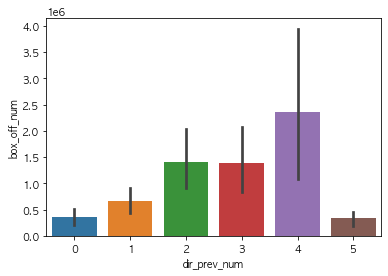

In [18]:
sns.barplot(data=train, x='dir_prev_num', y='box_off_num')

<AxesSubplot:xlabel='num_staff', ylabel='box_off_num'>

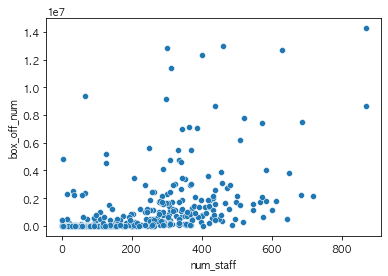

In [19]:
sns.scatterplot(data=train, x='num_staff', y='box_off_num')

In [20]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_SF,genre_공포,genre_느와르,genre_다큐멘터리,...,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,year,month,day
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,0.004290,-0.009848,0.174151,-0.303400,...,-0.090262,0.031110,0.016289,0.035617,-0.192651,0.166415,0.075757,-0.062575,-0.023969,-0.005590
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,0.076652,0.004758,0.007810,-0.137352,...,0.035086,NaN,-0.017048,-0.017602,-0.034003,0.068835,0.114415,-0.002137,0.064117,-0.111972
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.054248,0.050714,0.077037,-0.173434,...,0.036129,-0.067965,0.051792,0.006032,-0.133530,0.183462,0.057303,0.132621,0.034019,0.031544
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,0.041529,0.041874,0.209779,-0.344846,...,-0.035817,-0.082477,-0.034835,-0.014017,-0.122539,0.249187,0.108996,-0.032891,-0.002841,-0.009567
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,-0.000874,0.019558,-0.010128,-0.076703,...,-0.046865,-0.033996,-0.057575,-0.016716,0.152677,-0.009006,0.131034,-0.098869,-0.015063,-0.017823
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,0.088009,-0.017627,0.184869,-0.150310,...,-0.059728,-0.035211,-0.016888,-0.019807,-0.054872,0.181191,0.082780,-0.002497,0.019104,-0.026700
genre_SF,0.004290,0.076652,0.054248,0.041529,-0.000874,0.088009,1.000000,-0.040828,-0.032304,-0.063737,...,-0.057526,-0.013642,-0.025412,-0.008606,-0.028342,-0.032926,-0.046323,0.021702,-0.007262,-0.039464
genre_공포,-0.009848,0.004758,0.050714,0.041874,0.019558,-0.017627,-0.040828,1.000000,-0.059554,-0.117502,...,-0.106052,-0.025150,-0.046849,-0.015866,-0.052249,-0.060700,-0.085399,0.017298,0.020240,0.031370
genre_느와르,0.174151,0.007810,0.077037,0.209779,-0.010128,0.184869,-0.032304,-0.059554,1.000000,-0.092970,...,-0.083911,-0.019899,-0.037068,-0.012554,-0.041340,-0.048027,-0.067569,0.013021,-0.033931,0.025018
genre_다큐멘터리,-0.303400,-0.137352,-0.173434,-0.344846,-0.076703,-0.150310,-0.063737,-0.117502,-0.092970,1.000000,...,-0.165558,-0.039261,-0.073135,-0.024769,-0.081566,-0.094759,-0.133316,-0.012262,-0.002831,-0.046896


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   time            600 non-null    int64  
 3   screening_rat   600 non-null    object 
 4   director        600 non-null    object 
 5   dir_prev_bfnum  270 non-null    float64
 6   dir_prev_num    600 non-null    int64  
 7   num_staff       600 non-null    int64  
 8   num_actor       600 non-null    int64  
 9   box_off_num     600 non-null    int64  
 10  genre_SF        600 non-null    uint8  
 11  genre_공포        600 non-null    uint8  
 12  genre_느와르       600 non-null    uint8  
 13  genre_다큐멘터리     600 non-null    uint8  
 14  genre_드라마       600 non-null    uint8  
 15  genre_멜로/로맨스    600 non-null    uint8  
 16  genre_뮤지컬       600 non-null    uint8  
 17  genre_미스터리      600 non-null    uin

In [22]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

상위 5개 빼고 `기타` 로 처리

In [23]:
distributor_list = train['distributor'].value_counts()[:5]
def distibutor_func(x):
    if x in distributor_list:
        return x
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(distibutor_func)
train.groupby('distributor').mean()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_SF,genre_공포,genre_느와르,genre_다큐멘터리,...,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,year,month,day
distributor,,,,,,,,,,,,,,,,,,,,,
(주)NEW,112.033333,1.632148e+06,1.366667,277.266667,4.133333,2.184405e+06,0.033333,0.066667,0.066667,0.033333,...,0.066667,0.000000,0.000000,0.00000,0.033333,0.066667,0.100000,2012.900000,7.433333,16.000000
(주)마운틴픽쳐스,92.827586,1.092468e+05,0.448276,48.965517,2.896552,3.234221e+04,0.000000,0.034483,0.000000,0.275862,...,0.172414,0.000000,0.068966,0.00000,0.000000,0.000000,0.068966,2012.448276,7.551724,14.310345
(주)쇼박스,126.538462,1.619369e+06,1.807692,360.384615,3.923077,3.386656e+06,0.000000,0.038462,0.307692,0.000000,...,0.076923,0.000000,0.000000,0.00000,0.000000,0.192308,0.076923,2012.884615,7.076923,17.500000
CJ 엔터테인먼트,111.370370,1.374885e+06,1.481481,313.629630,3.777778,2.162742e+06,0.055556,0.092593,0.074074,0.000000,...,0.111111,0.000000,0.055556,0.00000,0.074074,0.074074,0.092593,2012.648148,6.685185,13.907407
기타,96.337408,7.889923e+05,0.645477,93.894866,3.682152,2.181273e+05,0.019560,0.066015,0.024450,0.202934,...,0.134474,0.012225,0.022005,0.00489,0.031785,0.029340,0.080685,2012.794621,6.987775,16.970660
롯데엔터테인먼트,110.750000,1.368342e+06,1.557692,312.000000,3.923077,1.238149e+06,0.019231,0.115385,0.057692,0.019231,...,0.153846,0.000000,0.057692,0.00000,0.057692,0.096154,0.153846,2012.500000,6.961538,17.057692


In [24]:
test['distributor'] = test['distributor'].apply(distibutor_func)

In [25]:
train = pd.get_dummies(train, columns=['distributor'])

In [26]:
test = pd.get_dummies(test, columns=['distributor'])

In [27]:
train = pd.get_dummies(train, columns=['screening_rat'])

In [28]:
test = pd.get_dummies(test, columns=['screening_rat'])

In [29]:
train.head()

,title,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_SF,genre_공포,...,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,distributor_롯데엔터테인먼트,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,개들의 전쟁,96,조병옥,NaN,0,91,2,23398,0,0,...,0,0,0,0,0,1,0,0,0,1
1,내부자들,130,우민호,1161602.50,2,387,3,7072501,0,0,...,0,0,1,0,0,0,0,0,0,1
2,은밀하게 위대하게,123,장철수,220775.25,4,343,4,6959083,0,0,...,0,0,1,0,0,0,0,1,0,0
3,나는 공무원이다,101,구자홍,23894.00,2,20,6,217866,0,0,...,1,0,0,0,0,0,0,0,1,0
4,불량남녀,108,신근호,1.00,1,251,2,483387,0,0,...,0,0,0,0,1,0,0,1,0,0


title: 의미 없음

director: 종류가 너무 많음

dir_prev_bfnum: 결측치가 너무 많음

In [30]:
train = train.drop(['title', 'director', 'dir_prev_bfnum'], axis=1)
test = test.drop(['title', 'director', 'dir_prev_bfnum'], axis=1)

In [31]:
print(train.shape, test.shape)

(600, 30) (243, 29)


In [80]:
train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,genre_SF,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,...,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,distributor_롯데엔터테인먼트,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,130,2,387,3,7072501,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,123,4,343,4,6959083,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,101,2,20,6,217866,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,108,1,251,2,483387,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 모델링

### RandomForestRegressor

In [35]:
train_x_arr = train.drop('box_off_num', axis=1).values
train_y_arr = train['box_off_num'].values

In [36]:
test_x_arr = test.values

In [39]:
x_train, x_val, y_train, y_val = train_test_split(train_x_arr, train_y_arr, test_size=0.2)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [71]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features="auto",
    max_leaf_nodes=None,
    )

In [72]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=10)

In [73]:
model.score(x_train, y_train)

0.6221024830157305

In [74]:
model.score(x_val, y_val)

0.4486507730233805

In [79]:
y_train_pred = model.predict(x_train)
mean_squared_error(y_pred=y_train_pred, y_true=y_train)

1181330052761.2148

In [77]:
y_val_pred = model.predict(x_val)
mean_squared_error(y_pred=y_val_pred, y_true=y_val)

2302152648617.878

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

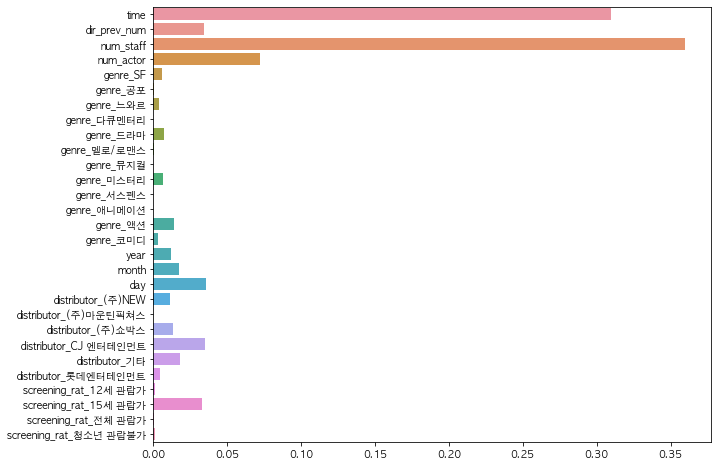

In [85]:
plt.figure(figsize=(10,8))
sns.barplot(model.feature_importances_, train.drop('box_off_num', axis=1).columns)